# assignament1

# Building a Model to predict iris species using support vector machine(svm) 
# and k-nearest Neighbours

In [3]:
#importing pandas library
import pandas as pd
df = pd.read_csv("IRIS.csv")

In [4]:
#the shape of the dataset
print(f"The dataset consist of {df.shape[0]} observations and {df.shape[1]} features")

The dataset consist of 150 observations and 5 features


In [5]:
#checking head of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,NaN,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# the list of features in the dataset
print(df.columns.tolist())

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [7]:
#checking for missing values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  144 non-null    float64
 1   sepal_width   143 non-null    float64
 2   petal_length  142 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
f"None of the features has more than {round(df["petal_length"].isna().sum()/df.shape[0]*100, 2)}% of missing values present in the dataset"

'None of the features has more than 5.33% of missing values present in the dataset'

# For futher analysis:
## 1.impute missing values
## 2.encode features

In [10]:
#checking the total number of unique values present in each of the features
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [11]:
#checking for the unique values in the feature "species"
print(df["species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [12]:
#encode the target variable "species"
df["species"] = df["species"].map({'Iris-setosa': 0 , 'Iris-versicolor':1 , 'Iris-virginica':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,NaN,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
#imputing missing values
df.fillna(df.mean(), inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.5,1.400000,0.2,0
1,4.900000,3.0,1.400000,0.2,0
2,4.700000,3.2,1.300000,0.2,0
3,5.867361,3.1,1.500000,0.2,0
4,5.000000,3.6,1.400000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.200000,2.3,2
146,6.300000,2.5,5.000000,1.9,2
147,6.500000,3.0,5.200000,2.0,2
148,6.200000,3.4,5.400000,2.3,2


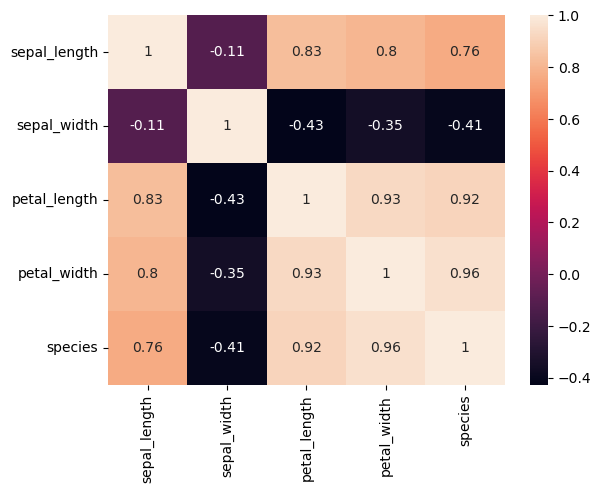

In [83]:
#checking for the relationship between the independent and target variable
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)
plt.show()

# model buildinng for SVM

In [58]:
#splitting the data into training and test set

x = df.drop(["species"], axis=1)
y = df["species"]

In [60]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.100000,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,4.700000,3.2,1.3,0.2
3,5.867361,3.1,1.5,0.2
4,5.000000,3.6,1.4,0.2


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [19]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.000000,0.2
15,5.7,4.4,1.500000,0.4
65,6.7,3.1,4.400000,1.4
11,4.8,3.4,1.600000,0.2
42,4.4,3.2,1.300000,0.2
...,...,...,...,...
71,6.1,2.8,4.000000,1.3
106,4.9,2.5,3.819718,1.7
14,5.8,4.0,1.200000,0.2
92,5.8,2.6,4.000000,1.2


In [87]:
#importing machine learning models
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
#setting parameters
knn = KNeighborsClassifier(n_neighbors=5)
clf = svm.SVC(kernel='linear', gamma='auto', C=2)

In [93]:
#training svm model
clf.fit(x_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [89]:
#training knn model
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [95]:
#svm model prediction 
y_pred_svm= clf.predict(x_test)
y_pred_svm

array([1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [108]:
#knn model prediction
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

# model evaluation for svm and knn

In [49]:
#importing metrics: accuracy_score and classification_report
from sklearn.metrics import accuracy_score,classification_report

In [51]:
#accuracy score for svm
print(accuracy_score(y_pred_svm, y_test))

0.9666666666666667


In [101]:
##accuracy score for knn
print(accuracy_score(y_pred_knn, y_test))

0.9


In [53]:
#classification report for svm
print(classification_report(y_pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [103]:
#classification report for knn
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.75      0.86        12
           2       1.00      1.00      1.00        11

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30



In [68]:
#saving csv
df.to_csv('cleaned_df.csv', index=False)